In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [3]:
from monary import Monary
import numpy as np
import pandas as pd
from monary.monary import mvoid_to_bson_id
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cluster
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction import DictVectorizer

In [4]:
mon = Monary("127.0.0.1")

# Capsule dataframe

In [6]:
columns = [
    "Capsule id",
    #"date created",
    #"date updated",
    "capsule name",
    "type of author",
    "author user id",
    "is draft",
    "is public",
    "approximate capsule duration"

]
arrays = mon.query(
"newbase", # database name
"capsule", # collection name
{}, # query spec
[
        "_id",
        #"date_created",
        #"date_updated",
        "name",
        "author._ref.$ref",
        "author._ref.$id",
        "publication.is_draft",
        "publication.is_public",
        "approximate_duration"

], # field names (in Mongo record)
[
        "id",
    #   "date",
        #"date",
        "string:100",
        "string:20",
        "id",
        "bool",
        "bool",
        "float32"
  
    ] # Monary field types (see below)
)
df_capsule = np.matrix(arrays).transpose() 

df_capsule = pd.DataFrame(df_capsule, columns=columns)

In [7]:
df_capsule["Capsule id"] = df_capsule["Capsule id"].apply(mvoid_to_bson_id)
df_capsule["author user id"]=df_capsule["author user id"].apply(mvoid_to_bson_id)
#df["date updated"]=df["date updated"].astype('int').astype("datetime64[ms]")
#df["date created"]=df["date created"].astype('int').astype("datetime64[ms]")
df_capsule["is draft"]=df_capsule["is draft"].apply(lambda x: 1 if x==True else 0)
df_capsule["is public"]=df_capsule["is public"].apply(lambda x: 1 if x==True else 0)
df_capsule["approximate capsule duration"]=df_capsule["approximate capsule duration"].astype('float')

In [8]:
df_capsule

,Capsule id,capsule name,type of author,author user id,is draft,is public,approximate capsule duration
0,564d8f200a728f682a81fcfb,Les courants pédagogiques,user,56549b580a728f30e3764182,1,0,0.0
1,564d90020a728f682a82002f,Les méthodes d'apprentissage,user,56549b580a728f30e3764182,1,0,0.0
2,564dc3d10a728f755ac63cc4,Qu'est-ce qu'être citoyen français ?,user,56549b380a728f30e4f58d0c,1,0,0.0
3,564dc4080a728f7559e667de,Jouer un rôle dans la société,user,56549b380a728f30e4f58d0c,1,0,0.0
4,564dc48b0a728f7559e667df,Témoignages de jeunes européens,user,56549b380a728f30e4f58d0c,1,0,0.0
5,564f70610a728f0a678dbbd6,Compositional bias in DiD models,user,564f68e80a728f08a779fe6e,1,0,0.0
6,564f707c0a728f0a678dbbd7,DiD econometric model,user,564f68e80a728f08a779fe6e,1,0,0.0
7,564f708b0a728f0a68b6b086,Triple differences,user,564f68e80a728f08a779fe6e,1,0,0.0
8,5661a4e30a728f18a76b8ccd,Pourquoi les entreprises s'engagent-elles?,organization,5791e5f8dfb7b874fcc153fa,1,0,0.0
9,564d1d7f0a728f682a81f781,Posture : le métier de formateur aujourd'hui,user,56549b580a728f30e3764182,0,0,540.0


# Export de la base de capsule

In [80]:
df_capsule.to_csv("BaseCapsule")

# Base Utilisateur

In [75]:
columns_user = ["user id", "first name", "last name", "date joined"]
arrays_user = mon.query(
"educanti",
"user",
{},
["_id","first_name","last_name","date_joined"],
["id","string:30","string:30","date"],

)
df_user = np.matrix(arrays_user).transpose()
df_user = pd.DataFrame(df_user, columns=columns_user)
df_user["user id"] = df_user["user id"].apply(mvoid_to_bson_id)
df_user["user name"] = df_user["first name"] + " " + df_user["last name"]
df_user["date joined"] = df_user["date joined"].astype("int")
df_user = df_user[["user id","user name", "date joined"]]
df_user

,user id,user name,date joined
0,564dcb8e0a728f7559d6efb7,Hai Ly,1447938958398
1,5674339b0a728f1e0b9e5f12,Yassine Ghandi,1450455963000
2,570d1e3f0a728f61ed86cbb6,Victoria Kraynova,1460477503858
3,570f5cfa0a728f61ed86dc63,Gryzz Ly,1460624634000
4,570f94b40a728f7079c414e3,KRAYNOVA Victoria,1460638900130
5,5714f58c0a728f0a16827570,Anne-Sophie Robilliard,1460991372388
6,5721dd050a728f2641e79da0,Maxime Taisne,1461837061101
7,5721ff960a728f2642a5cdf7,Anne Bodénant,1461845910905
8,5721ffa70a728f2642a5cdf9,Anna Stevanato,1461845927914
9,56549b580a728f30e3764182,Séverine Charlon,1448385368000


# Export de la base utilisateur 

In [78]:
df_user.to_csv("BaseUtilisateurs")

# Base de Test Attempts

In [8]:
columns_test_attempt = [
    "Test Attempt id",
    #"date created",
    #"date updated",
    "Capsule id",
    "user id",
    "is completed",
    "is succeeded",
    "score"

]
arrays_test_attempt = mon.query(
"educanti", # database name
"test_attempt", # collection name
{}, # query spec
[
        "_id",
        #"date_created",
        #"date_updated",
        "test_container._ref.$id",
        "user",
        "is_completed",
        "is_succeeded",
        "score"

], # field names (in Mongo record)
[
        "id",
        #"date",
        #"date",
        "id",
        "id",
        "bool",
        "bool",
        "float32"
  
    ] # Monary field types (see below)
)
df_test_attempt = np.matrix(arrays_test_attempt).transpose() 

df_test_attempt = pd.DataFrame(df_test_attempt, columns=columns_test_attempt)
df_test_attempt["Test Attempt id"] = df_test_attempt["Test Attempt id"].apply(mvoid_to_bson_id)
df_test_attempt["user id"]=df_test_attempt["user id"].apply(mvoid_to_bson_id)
df_test_attempt["Capsule id"]=df_test_attempt["Capsule id"].apply(mvoid_to_bson_id)
#df_test_attempt["date updated"]=df_test_attempt["date updated"].astype('int').astype("datetime64[ms]")
#df_test_attempt["date created"]=df_test_attempt["date created"].astype('int').astype("datetime64[ms]")
df_test_attempt

,Test Attempt id,Capsule id,user id,is completed,is succeeded,score
0,57288acd0a728f7346c5567c,56b371740a728f745f33a0b0,56b282a60a728f56a0f9874f,True,True,1
1,564dc8680a728f755ac642b9,564dc3e30a728f7559e667dd,564fa20a0a728f0a68b6b089,True,False,1
2,564dc8e60a728f755ac64334,564dc4940a728f755ac63cc8,564fa20a0a728f0a68b6b089,False,False,0
3,564dc8e60a728f755ac64341,564dc4940a728f755ac63cc8,564fa20a0a728f0a68b6b089,True,False,1
4,564dc90d0a728f7559e66b53,564dc49f0a728f7559e667e0,564fa20a0a728f0a68b6b089,False,False,0
5,564dc90d0a728f755ac643ad,564dc49f0a728f7559e667e0,564fa20a0a728f0a68b6b089,True,False,1
6,564dca210a728f7559e66c60,564dc49f0a728f7559e667e0,56603e830a728f0e8ea09720,True,False,1
7,564f33430a728f02c3d0278b,564dc4080a728f7559e667de,564f68e80a728f08a779fe6e,False,False,0
8,564f33430a728f02c4f1be82,564dc4080a728f7559e667de,564f68e80a728f08a779fe6e,False,False,0
9,57286b350a728f6f1756889c,56b36e930a728f745f33a064,56b283cb0a728f569f96ffbd,False,False,0


# Sauvegarde de la base de Test Attempts

In [9]:
df_test_attempt.to_csv("BaseTestAttempts")

In [17]:
df5 = df[['Capsule id','name']]

In [18]:
df6 = pd.merge(left=df5,right=df4,on="Capsule id",how ='inner')
df6

,Capsule id,name,Test Attempt id,date created,date updated,user id,is completed,is succeeded,score
0,5708cd130a728f3f7b9a942c,Encore une capsule,573c542f0a728f49fef98ae8,2016-05-18 11:38:23.734,2016-05-18 11:38:23.735,000000000000000000000000,False,False,0
1,5708cd130a728f3f7b9a942c,Encore une capsule,573c618a0a728f4b4d490aa3,2016-05-18 12:35:22.564,2016-05-18 12:35:22.565,000000000000000000000000,False,False,0
2,56dda29d0a728f56a6bc0d7f,Les enjeux sociaux comtemporains,576bfce4dfb7b81e8663ab8c,2016-06-23 15:14:44.878,2016-06-23 15:14:44.879,000000000000000000000000,False,False,0
3,564f69570a728f08a8b47e91,Gènes et allèles,56520ee10a728f118da29f78,2015-11-22 18:52:17.164,1970-01-01 00:00:00.000,000000000000000000000000,False,False,0
4,564f69570a728f08a8b47e91,Gènes et allèles,56530c310a728f21b644075c,2015-11-23 12:53:05.271,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0
5,564f69570a728f08a8b47e91,Gènes et allèles,5654227c0a728f21b644083b,2015-11-24 08:40:28.227,1970-01-01 00:00:00.000,564f68e80a728f08a779fe6e,False,False,0
6,564f69570a728f08a8b47e91,Gènes et allèles,565422bb0a728f21b644093b,2015-11-24 08:41:31.617,1970-01-01 00:00:00.000,000000000000000000000000,False,False,0
7,564f69570a728f08a8b47e91,Gènes et allèles,5654231b0a728f21b6440950,2015-11-24 08:43:07.045,1970-01-01 00:00:00.000,000000000000000000000000,False,False,0
8,564f69570a728f08a8b47e91,Gènes et allèles,5654235b0a728f21b644098d,2015-11-24 08:44:11.235,1970-01-01 00:00:00.000,000000000000000000000000,False,False,0
9,564f69570a728f08a8b47e91,Gènes et allèles,5654236c0a728f21b582deaf,2015-11-24 08:44:28.505,1970-01-01 00:00:00.000,000000000000000000000000,False,False,0


In [19]:
df7 = pd.merge(left=df6,right=df2,on="user id",how ='inner')
df7["whole name"] = df7["first name"] + " " + df7["last name"]
df7

,Capsule id,name,Test Attempt id,date created,date updated,user id,is completed,is succeeded,score,first name,last name,whole name
0,564f69570a728f08a8b47e91,Gènes et allèles,56530c310a728f21b644075c,2015-11-23 12:53:05.271,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
1,564f69570a728f08a8b47e91,Gènes et allèles,566040870a728f109ec6af70,2015-12-03 13:15:51.103,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
2,564f69570a728f08a8b47e91,Gènes et allèles,566195150a728f17564a3789,2015-12-04 13:28:53.343,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
3,564f69570a728f08a8b47e91,Gènes et allèles,5677f9470a728f33e1759f30,2015-12-21 13:06:15.110,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
4,564f69570a728f08a8b47e91,Gènes et allèles,567db7d10a728f09e11fba93,2015-12-25 21:40:33.976,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
5,564f69570a728f08a8b47e91,Gènes et allèles,567dba550a728f16d74a6a3e,2015-12-25 21:51:17.838,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
6,564f69570a728f08a8b47e91,Gènes et allèles,567e99a40a728f1be1860989,2015-12-26 13:44:04.845,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
7,564f69570a728f08a8b47e91,Gènes et allèles,567e9e130a728f1be1860bd5,2015-12-26 14:02:59.350,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
8,564f69570a728f08a8b47e91,Gènes et allèles,56813b220a728f281e80fee3,2015-12-28 13:37:38.514,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert
9,564f69570a728f08a8b47e91,Gènes et allèles,56813d230a728f281e81047e,2015-12-28 13:46:11.540,1970-01-01 00:00:00.000,564fa20a0a728f0a68b6b089,False,False,0,Arnaud,Riegert,Arnaud Riegert


In [20]:
df7["is completed"] = df7["is completed"].apply(lambda x: 1 if x==True else 0)
df7["is succeeded"] = df7["is succeeded"].apply(lambda x: 1 if x==True else 0)
df8 = df7.groupby("whole name").sum()
df8.to_csv("nombre_comp_util")
df9 = df7.groupby("name").sum()
(df9["is succeeded"] / df9["is completed"]).to_csv("va_t_il_marcher")

# Let's Play with our Statements

# Question DataSet

In [12]:
def get_question_number(question):
    l = question.strip(']').split('[')
    n = len(l)
    return l[-1]

In [14]:
columns_questions = [
    "Capsule id",
    "date created",
    "date updated",
    "user id",
    "test attempt",
    "question number",
    "duration",
    "success"

]
arrays_questions = mon.query(
"educanti", # database name
"statement", # collection name
{"verb.identifier": "http://adlnet.gov/expapi/verbs/answered"}, # query spec
[
        "context.contextActivities.parent.0.object._ref.$id",
        "date_created",
        "date_updated",
        "actor.account.user",
        "object.definition.object._ref.$id",
        "object.definition.sub_element",
        "result.duration",
        "result.success"

], # field names (in Mongo record)
[
        "id",
        "date",
        "date",
        "id",
        "id",
        "string:100",
        "float32",
        "bool"
  
    ] # Monary field types (see below)
)
df_questions = np.matrix(arrays_questions).transpose() 

df_questions = pd.DataFrame(df_questions, columns=columns_questions)

In [16]:
df_questions["Capsule id"] = df_questions["Capsule id"].apply(mvoid_to_bson_id).astype("string")
df_questions["user id"]=df_questions["user id"].apply(mvoid_to_bson_id).astype("string")
df_questions["test attempt"]=df_questions["test attempt"].apply(mvoid_to_bson_id).astype("string")
df_questions["date updated"]=df_questions["date updated"].astype('int')
df_questions["date created"]=df_questions["date created"].astype('int')
df_questions["question number"]=df_questions["question number"].apply(get_question_number)
df_questions["success"]=df_questions["success"].apply(lambda x: 1 if x==True else 0)
df_questions["duration"]=df_questions["duration"].astype('float')

In [17]:
df_questions

,Capsule id,date created,date updated,user id,test attempt,question number,duration,success
0,5673dabb0a728f0d8d53a51d,1467817860189,1467817860248,56a2368b0a728f46fb5249f8,572881960a728f7346c5425f,0,4.848000,0
1,5673dabb0a728f0d8d53a51d,1467817860263,1467817860322,56a2368b0a728f46fb5249f8,5728810a0a728f7346c541f1,0,24.451000,0
2,570fc3500a728f70799d00e2,1467817860352,1467817860401,56a2368b0a728f46fb5249f8,572876240a728f7346c505f3,0,6.280000,0
3,570fc3500a728f70799d00e2,1467817860411,1467817860453,56a2368b0a728f46fb5249f8,572876190a728f7346c505cb,0,3.673000,0
4,570fc3500a728f70799d00e2,1467817860473,1467817860517,56a2368b0a728f46fb5249f8,572875c60a728f7346c4f8f8,0,4.005000,0
5,570fc3500a728f70799d00e2,1467817860530,1467817860573,56a2368b0a728f46fb5249f8,57286eae0a728f6f1756e5bf,0,2.504000,0
6,564dc3e30a728f7559e667dd,1467817860588,1467817860633,564fa20a0a728f0a68b6b089,564dc8680a728f755ac642b9,0,5.590000,1
7,564dc3e30a728f7559e667dd,1467817860644,1467817860650,564fa20a0a728f0a68b6b089,564dc8680a728f755ac642b9,1,12.302000,1
8,564dc4940a728f755ac63cc8,1467817860661,1467817860684,564fa20a0a728f0a68b6b089,564dc8e60a728f755ac64341,0,5.480000,1
9,564dc4940a728f755ac63cc8,1467817860691,1467817860695,564fa20a0a728f0a68b6b089,564dc8e60a728f755ac64341,1,5.456000,1


# Export Base Questions

In [19]:
df_questions.to_csv("BaseQuestions")

In [27]:
numerique = [ c for c,d in zip(df.columns,df.dtypes) if d == np.int64 and c not in ["success"] ]
categories = [ c for c in df.columns if c not in numerique and c not in ["success"] ]
target = "success"
num = df[ numerique ]
cat = df[ categories ]
tar = df[ target ]
prep = DictVectorizer()
cat_as_dicts = [dict(r.iteritems()) for _, r in cat.iterrows()]
temp = prep.fit_transform(cat_as_dicts)
cat_exp = temp.toarray()
cat_exp_df = pd.DataFrame( cat_exp, columns = prep.feature_names_ )
X = (pd.concat ( [ num, cat_exp_df ], axis= 1))
Y = (tar)

In [ ]:
desc = pd.concat([X,Y],axis=1)
desc

# Un peu d'Analyse des données

## Corrélation des variables entre elles

In [34]:
from sklearn.decomposition import RandomizedPCA as PCA
pca = PCA(n_components=4)
x_transpose = desc.T
pca.fit(x_transpose)

RandomizedPCA(copy=True, iterated_power=3, n_components=4, random_state=None,
       whiten=False)

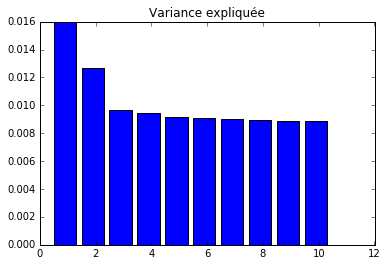

In [35]:
from sklearn.preprocessing import normalize
xtnorm = normalize(x_transpose)
pca = PCA(n_components=10)
pca.fit(xtnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

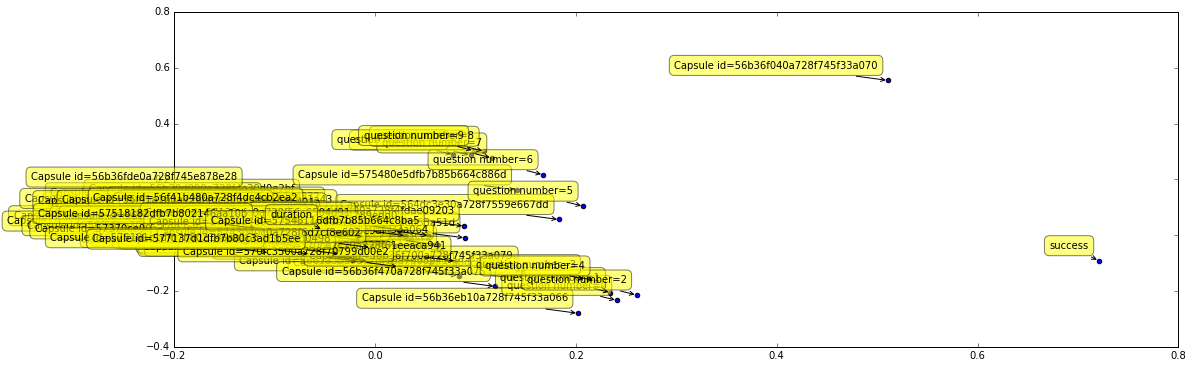

In [36]:
Xt_reduced = pca.transform(xtnorm)
plt.figure(figsize=(18,6))
plt.scatter(Xt_reduced[:, 0], Xt_reduced[:, 1])
for label, x, y in zip(x_transpose.index, Xt_reduced[:, 0], Xt_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

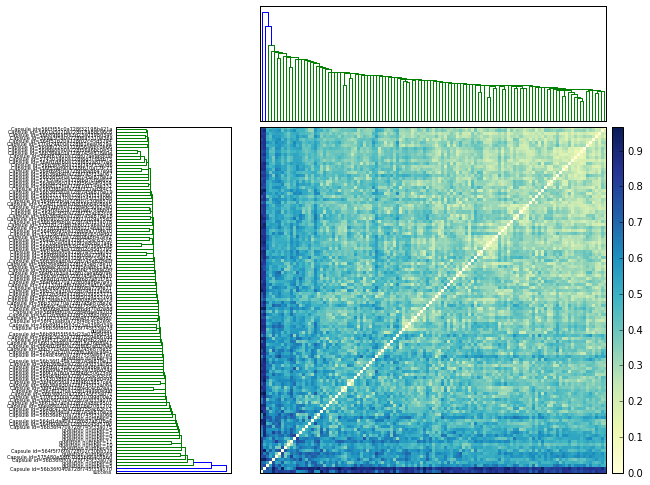

In [37]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from fastcluster import linkage
data_link = linkage(Xt_reduced, method='single', metric='euclidean', preserve_input=True)
data_dist = pdist(Xt_reduced)
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(data_link, orientation='right',labels=x_transpose.index)
ax1.set_xticks([])
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(data_link)
ax2.set_xticks([])
ax2.set_yticks([])
#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

In [16]:
Z1['leaves']

[10, 3, 11, 5, 12, 7, 6, 9, 2, 8, 4, 1, 0, 13]

## Corrélation des individus entre eux

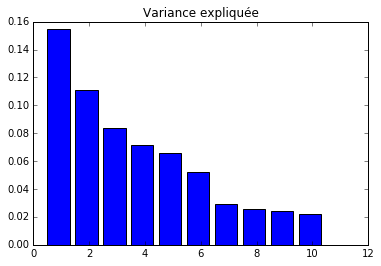

In [38]:
from sklearn.preprocessing import normalize
xnorm = normalize(desc)
pca = PCA(n_components=10)
pca.fit(xnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [39]:
X_reduced = pca.transform(xnorm)

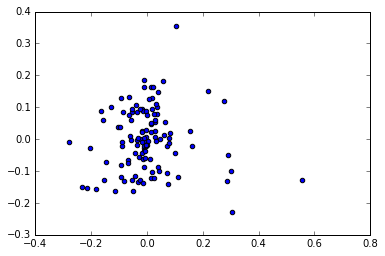

In [40]:
plt.scatter(Xt_reduced[:,1],Xt_reduced[:,2])

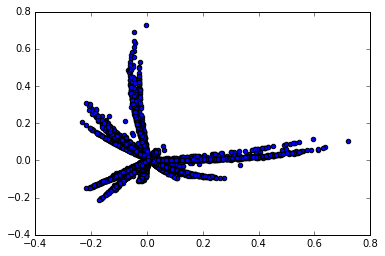

In [41]:
plt.scatter(X_reduced[:,1],X_reduced[:,2])


In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(desc.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from fastcluster import linkage
data_link = linkage(X_reduced, method='single', metric='euclidean', preserve_input=True)
data_dist = pdist(X_reduced)
fig = plt.figure(figsize=(10,10))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(data_link, orientation='right',labels=desc.index)
ax1.set_xticks([])
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(data_link)
ax2.set_xticks([])
ax2.set_yticks([])
#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

# Machine Learning


In [28]:
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 0)

In [29]:
from xgboost import XGBClassifier

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier


clf = Pipeline([
      ('normalize', Normalizer()),
      ('classifier', GradientBoostingClassifier(random_state = 1))
    ])
clf2 = XGBClassifier(missing=np.nan,gamma = 1.5, max_depth=30, n_estimators=350, learning_rate=0.01, nthread=30, subsample=0.95, colsample_bytree=0.90, seed=4242)
clf2 = clf2.fit(X_train, Y_train.ravel())

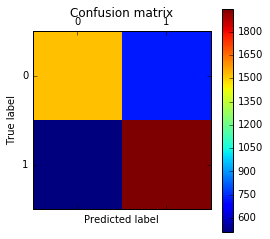

In [36]:
from sklearn.metrics import confusion_matrix
for x,y in [ (X_train, Y_train), (X_test, Y_test) ]:
    yp  = clf2.predict(x)
    cm = confusion_matrix(y.ravel(), yp.ravel())
    print(cm)
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
savefig("conf_mat1.png")

In [38]:
cm

array([[1523,  727],
       [ 511, 1949]])

In [37]:
from sklearn import metrics
metrics.classification_report(Y_test,clf2.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.75      0.68      0.71      2250\n          1       0.73      0.79      0.76      2460\n\navg / total       0.74      0.74      0.74      4710\n'

In [40]:
from sklearn.metrics import roc_curve, auc
probas = clf2.predict_proba(X_test)
probas[:5]

array([[ 0.63462865,  0.36537132],
       [ 0.37134647,  0.62865353],
       [ 0.81081057,  0.18918945],
       [ 0.43576682,  0.56423318],
       [ 0.95063007,  0.04936995]], dtype=float32)

In [45]:
rep = [ ]
yt = Y_test.ravel()
for i in range(probas.shape[0]):
    p0,p1 = probas[i,:]
    exp = yt[i]
    if p0 > p1 :
        if exp == 0 :
            # bonne réponse
            rep.append ( (1, p0) )
        else :
            # mauvaise réponse
            rep.append( (0,p0) )
    else :
        if exp == 0 :
            # mauvaise réponse
            rep.append ( (0, p1) )
        else :
            # bonne réponse
            rep.append( (1,p1) )
mat_rep = numpy.array(rep)
mat_rep[:5]
mat_rep

array([[ 0.        ,  0.63462865],
       [ 1.        ,  0.62865353],
       [ 1.        ,  0.81081057],
       ..., 
       [ 1.        ,  0.86168545],
       [ 1.        ,  0.64065713],
       [ 1.        ,  0.69817787]])

In [43]:
"taux de bonne réponse",sum(mat_rep[:,0]/len(mat_rep)) # voir matrice de confusion

('taux de bonne r\xc3\xa9ponse', 0.73715498938428881)

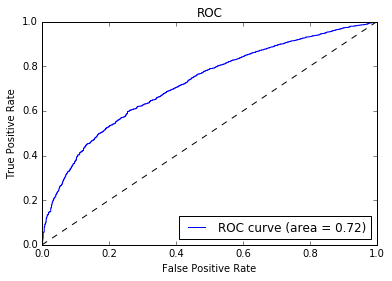

In [44]:
fpr, tpr, thresholds = roc_curve(mat_rep[:,0], mat_rep[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
savefig("ROC.png")

# Amélioration de la base

## Import des bases de données


In [ ]:
df_capsule = pd.read_csv("BaseCapsule", index_col=0)
df_user = pd.read_csv("BaseUtilisateurs",index_col=0)
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_questions = pd.read_csv("BaseQuestions",index_col=0)


In [61]:
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_test_attempt = df_test_attempt.rename(columns={'Test Attempt id':'test attempt'})[['test attempt','is completed','is succeeded','score']]
df_test_attempt

,test attempt,is completed,is succeeded,score
0,57288acd0a728f7346c5567c,True,True,1.000000
1,564dc8680a728f755ac642b9,True,False,1.000000
2,564dc8e60a728f755ac64334,False,False,0.000000
3,564dc8e60a728f755ac64341,True,False,1.000000
4,564dc90d0a728f7559e66b53,False,False,0.000000
5,564dc90d0a728f755ac643ad,True,False,1.000000
6,564dca210a728f7559e66c60,True,False,1.000000
7,564f33430a728f02c3d0278b,False,False,0.000000
8,564f33430a728f02c4f1be82,False,False,0.000000
9,57286b350a728f6f1756889c,False,False,0.000000


In [ ]:
df_questions_user = pd.merge(left=df_user,right=df_questions,on="user id",how ='inner')

In [ ]:
df_questions_user_capsule = pd.merge(left=df_capsule,right=df_questions_user,on="Capsule id",how ='inner')

In [ ]:
df_user = df_user.rename(columns={'user id': 'author user id','user name':'author user name'})

In [ ]:
df_questions_user_author_capsule = pd.merge(left=df_user[["author user id","author user name"]],right=df_questions_user_capsule,on="author user id",how ='inner')

In [66]:
df = pd.merge(left=df_test_attempt,right=df_questions_user_author_capsule,on="test attempt",how='inner')
df["is completed"]=df["is completed"].apply(lambda x: 1 if x==True else 0)
df["is succeeded"]=df["is succeeded"].apply(lambda x: 1 if x==True else 0)

,test attempt,is completed,is succeeded,score,author user id,author user name,Capsule id,capsule name,type of author,is draft,is public,approximate capsule duration,user id,user name,date joined,date created,date updated,question number,duration,success
0,57288acd0a728f7346c5567c,1,1,1.0,56b282a60a728f56a0f9874f,Audrey Chagneau,56b371740a728f745f33a0b0,Premier modèle de la tectonique des plaques de...,user,1,0,0.0,56b282a60a728f56a0f9874f,Audrey Chagneau,1454539430147,1467817861110,1467817861130,0,30.591999,1
1,57288acd0a728f7346c5567c,1,1,1.0,56b282a60a728f56a0f9874f,Audrey Chagneau,56b371740a728f745f33a0b0,Premier modèle de la tectonique des plaques de...,user,1,0,0.0,56b282a60a728f56a0f9874f,Audrey Chagneau,1454539430147,1467817861140,1467817861143,1,23.615999,1
2,57288acd0a728f7346c5567c,1,1,1.0,56b282a60a728f56a0f9874f,Audrey Chagneau,56b371740a728f745f33a0b0,Premier modèle de la tectonique des plaques de...,user,1,0,0.0,56b282a60a728f56a0f9874f,Audrey Chagneau,1454539430147,1467818354705,1467818354724,0,30.591999,1
3,57288acd0a728f7346c5567c,1,1,1.0,56b282a60a728f56a0f9874f,Audrey Chagneau,56b371740a728f745f33a0b0,Premier modèle de la tectonique des plaques de...,user,1,0,0.0,56b282a60a728f56a0f9874f,Audrey Chagneau,1454539430147,1467818354734,1467818354737,1,23.615999,1
4,564dc8680a728f755ac642b9,1,0,1.0,56549b380a728f30e4f58d0c,Lucas Gruez,564dc3e30a728f7559e667dd,Citoyenneté et nationalité,user,0,0,600.0,564fa20a0a728f0a68b6b089,Arnaud Riegert,1448059402000,1467817860588,1467817860633,0,5.590000,1


In [ ]:
df["is user author"] = (df["author user id"] == df["user id"]).apply(lambda x: 1 if x==True else 0)

In [71]:
df.to_csv("BaseFinale")

# Commencer ici

In [ ]:
df = pd.read_csv("BaseFinale",index_col=0)

# Base de travail

In [75]:
new_columns = [
    "is completed",
    "is succeeded",
    "score",
    "type of author",
    "is draft",
    "is public",
    'approximate capsule duration',
    "date joined",
    "date created",
    "date updated",
    "question number",
    "duration",
    "success",
    "is user author"
]
df = df[new_columns]
df.head()

,is completed,is succeeded,score,type of author,is draft,is public,approximate capsule duration,date joined,date created,date updated,question number,duration,success,is user author
0,1,1,1.0,user,1,0,0.0,1454539430147,1467817861110,1467817861130,0,30.591999,1,1
1,1,1,1.0,user,1,0,0.0,1454539430147,1467817861140,1467817861143,1,23.615999,1,1
2,1,1,1.0,user,1,0,0.0,1454539430147,1467818354705,1467818354724,0,30.591999,1,1
3,1,1,1.0,user,1,0,0.0,1454539430147,1467818354734,1467818354737,1,23.615999,1,1
4,1,0,1.0,user,0,0,600.0,1448059402000,1467817860588,1467817860633,0,5.590000,1,0


# Traitement Base de Données